<a href="https://githubtocolab.com/juanDev-47/prediccion-de-insuficiencia-cardiaca/blob/main/prediccion_insuficiencia_cardiaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #FDD20E; text-align: center; line-height: 0.75;background-color: #F93822"><b>Prediccion de insuficiencia cardiaca</b><br></h1>

### Importacion de librerias

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [18]:
# install kaggle
!pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"juanpabloarenasvlez","key":"071c6ee9923b83e13012ccfe5fe1104b"}'}

In [19]:
# create a kaggle folder
! mkdir ~/.kaggle
# copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/
# permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json
# to list all datasets in kaggle
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                         title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                146KB  2023-10-05 06:45:37          10596        238  1.0              
zeesolver/consumer-behavior-and-shopping-habits-dataset     Consumer Behavior and Shopping Habits Dataset:  146KB  2023-10-19 13:36:26           1256         28  1.0              
nelgiriyewithana/top-spotify-songs-2023                     Most Streamed Spotify Songs 2023                 47KB  2023-08-26 11:04:57          40311       1155  1.0              
nelgiriyewithana/billionaires-statistics

In [20]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction

heart-failure-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [21]:
!unzip heart-failure-prediction.zip

Archive:  heart-failure-prediction.zip
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: heart.csv               


In [41]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


### Informacion de los datos :

In [23]:
data.shape

(918, 12)

In [24]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


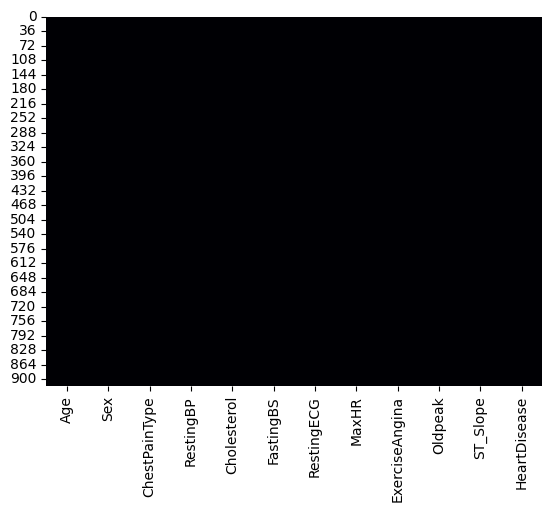

In [26]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

- **Sin valores nulos** presentes en la data!

In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
FastingBS,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20
HeartDisease,918.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


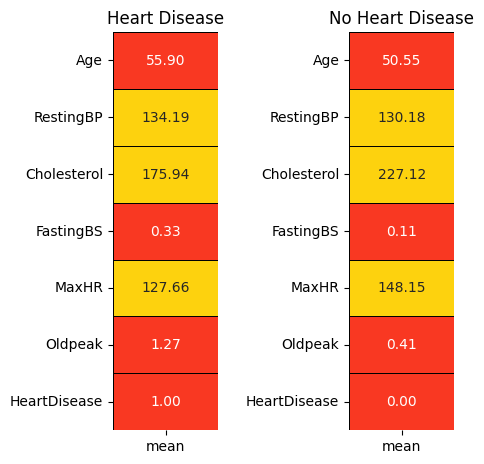

In [40]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

- **Valores medios** de todas las características para casos de enfermedades cardíacas y no cardíacas

# <center><div style="font-family: Trebuchet MS; background-color: #F93822; color: #FDD20E; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

### Dividir características en numéricas y categóricas :

In [42]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Caracteristicas categoricas :',*categorical_features)
print('Caracteristicas numericas :',*numerical_features)

Caracteristicas categoricas : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Caracteristicas numericas : Age RestingBP Cholesterol MaxHR Oldpeak


- Aquí, las características categóricas se definen si el atributo tiene menos de 6 elementos únicos; de lo contrario, es una característica numérica.
- El enfoque típico para esta división de características también puede basarse en los tipos de datos de los elementos del atributo respectivo.


- Para este conjunto de datos, como la cantidad de funciones es menor, también podemos verificar el conjunto de datos manualmente.

### Características categóricas :

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

- Crear una copia del conjunto de datos original y una etiqueta que codifique los datos de texto de las características categóricas.
- Las modificaciones en el conjunto de datos original no se resaltarán en esta copia.
- Por lo tanto, utilizamos esta copia del conjunto de datos que tiene todas las características convertidas en valores numéricos con fines de visualización y modelado.

#### Distribución de características categóricas :

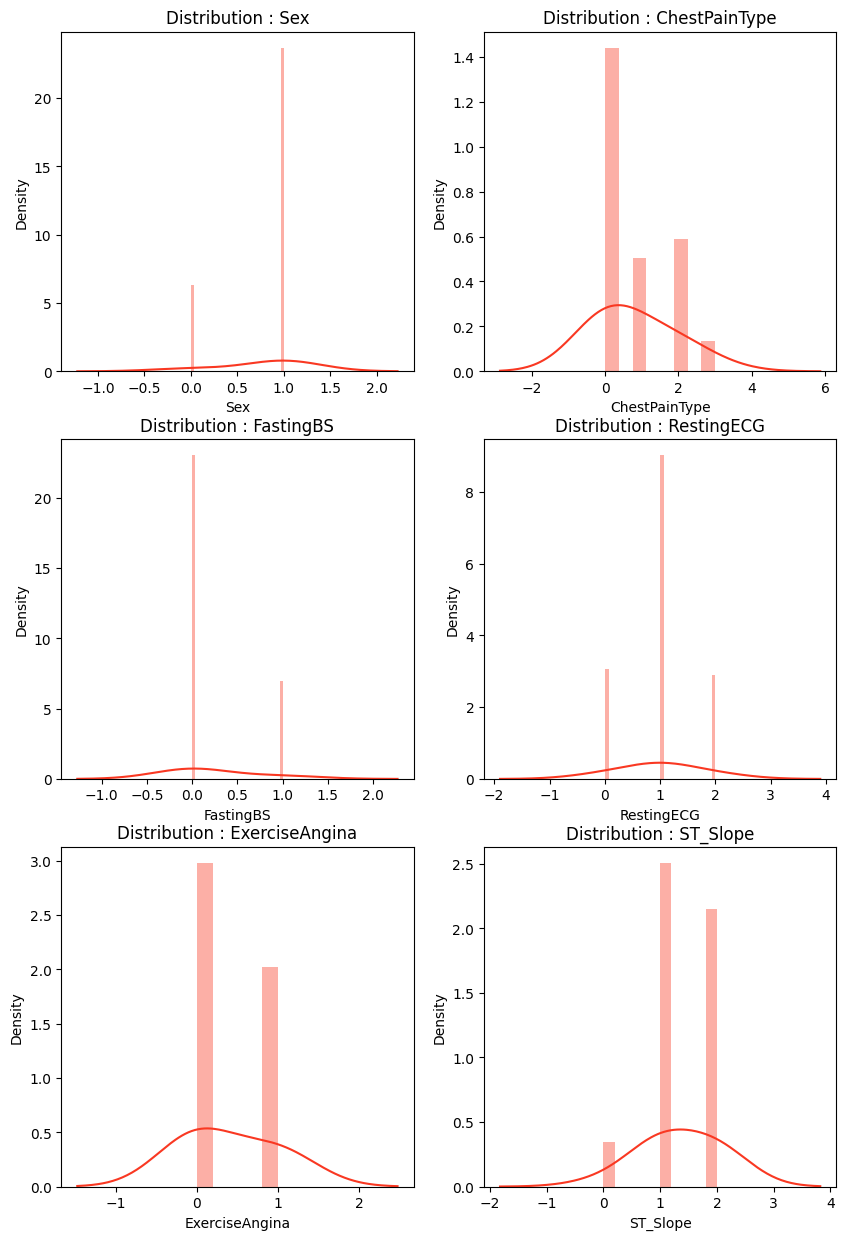

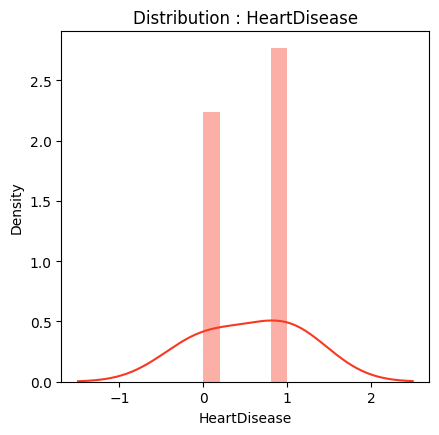

In [44]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):

    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

- Todas las características categóricas están cerca de la **Distribuccion normal**.

### Características numéricas:

#### Distribución de características numéricas :

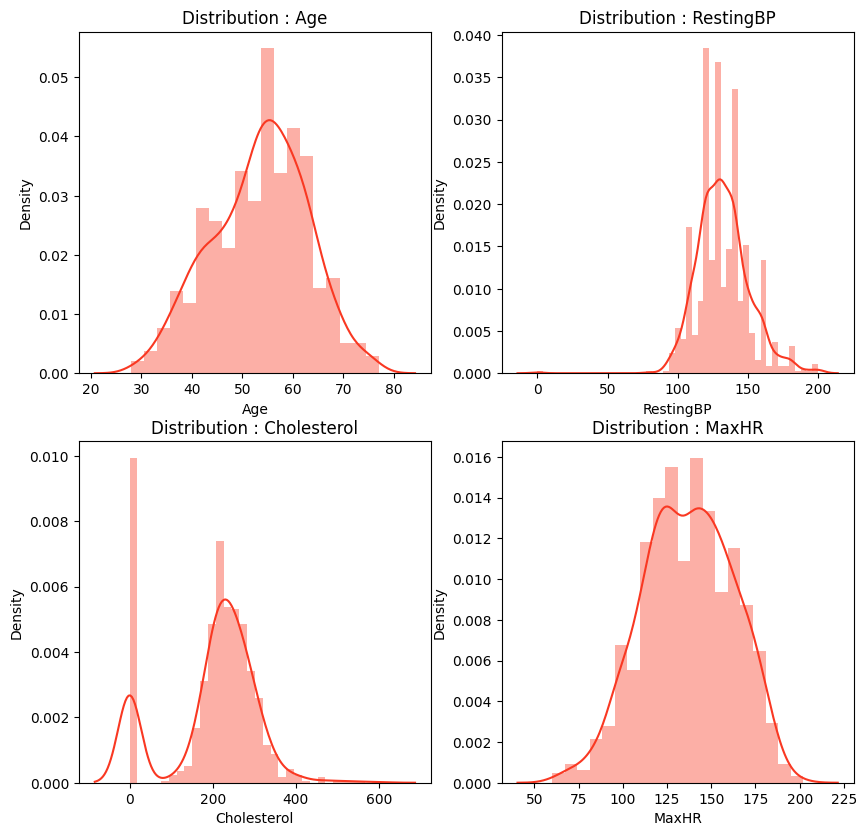

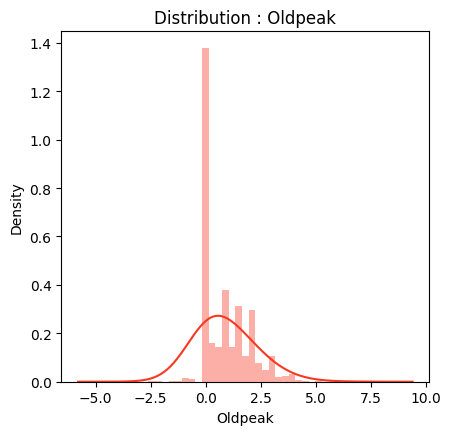

In [45]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

- **Oldpeak's** la distribución de datos está correctamente sesgada.
- **Cholestrol** tiene una distribución de datos bidmodal.

### Visualización de variables objetivo (HeartDisease) :

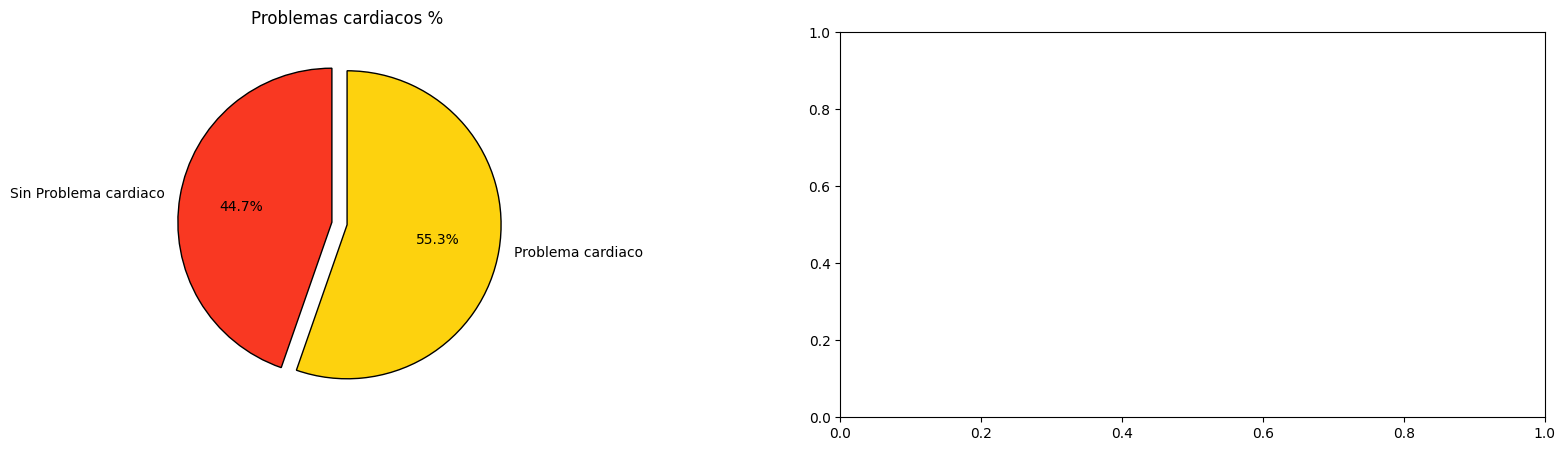

In [46]:
l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Sin Problema cardiaco','Problema cardiaco'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Problemas cardiacos %');


plt.show()

- El conjunto de datos está prácticamente **balanceado!**

### Características categóricas frente a variable objetivo (HeartDisease) :

### Características categóricas versus casos positivos de enfermedad cardíaca :

In [55]:
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

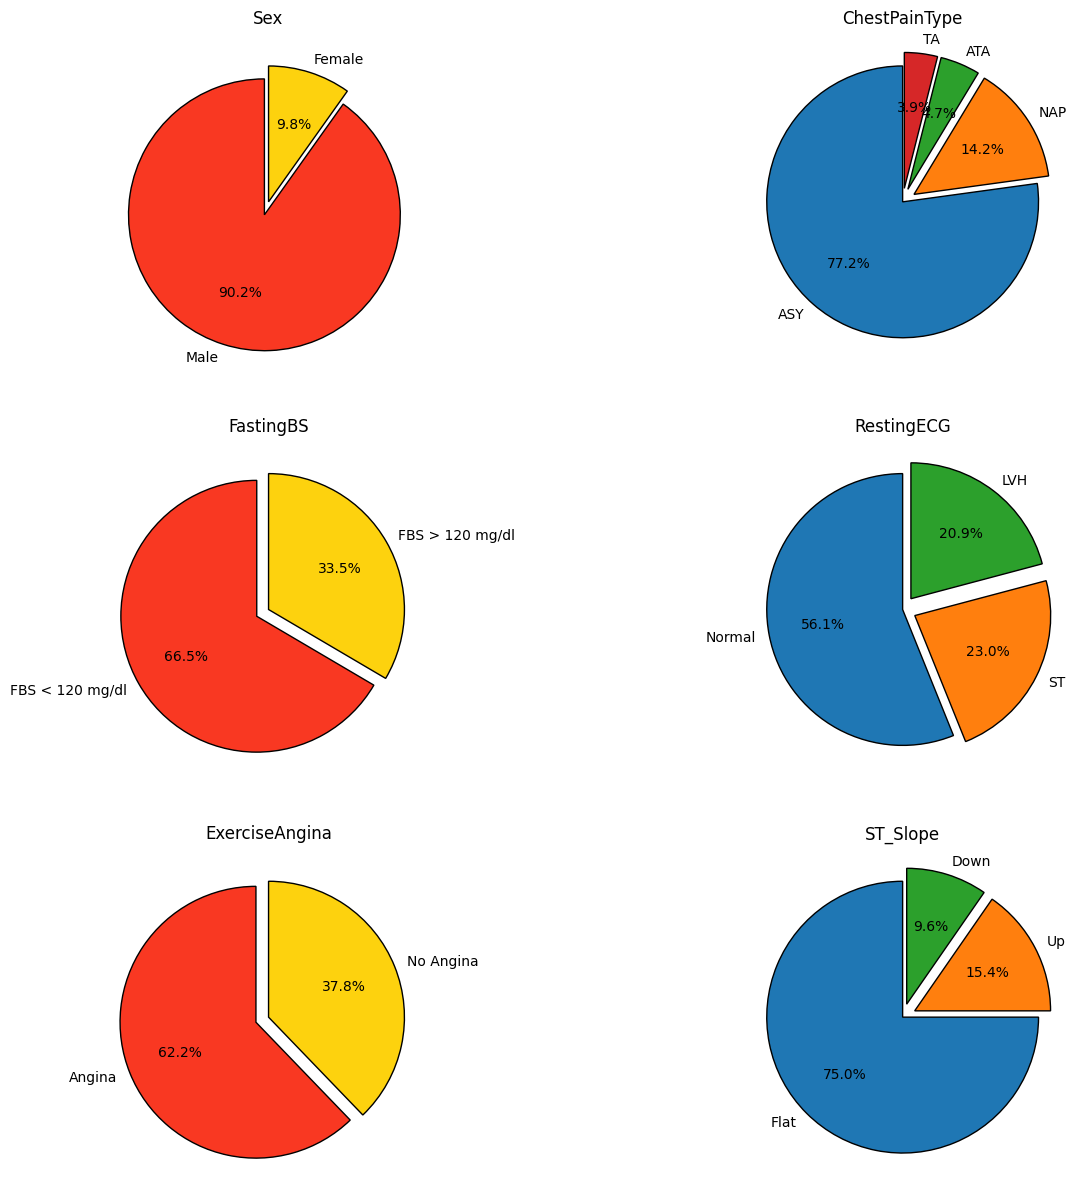

In [56]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

- La población **masculina** tiene más pacientes con enfermedades cardíacas que sin ellos. En el caso de la población **femenina**, los pacientes con enfermedades cardíacas son menos que ningún paciente con enfermedades cardíacas.
- **ASY** tipo de dolor en el pecho apunta audazmente hacia grandes posibilidades de enfermedad cardíaca.
- **Fasting Blood Sugar** ¡Es complicado! Los pacientes diagnosticados con azúcar en sangre en ayunas y sin azúcar en sangre en ayunas tienen pacientes con enfermedades cardíacas importantes.
- **RestingECG** no presenta una categoría clara que destaque a los pacientes con enfermedades cardíacas. Los 3 valores consisten en un gran número de pacientes con enfermedades cardíacas.
- **Exercise Induced Engina** Definitivamente aumenta la probabilidad de ser diagnosticado con enfermedades cardíacas.
- Con el **ST_Slope** En valores bajos, la pendiente **plana** muestra una probabilidad muy alta de ser diagnosticado con una enfermedad cardíaca. **Abajo** también muestra el mismo resultado pero en muy pocos puntos de datos.

- De todos los pacientes con enfermedades cardíacas, un asombroso 90% son **hombres**.
- Cuando se trata del tipo de dolor en el pecho, el tipo **ASY** tiene la mayoría con un 77% que conduce a enfermedades cardíacas.
- **Fasting Blood Sugar** un nivel < 120 mg/dl muestra altas posibilidades de enfermedades cardíacas.
- Para **ECG en reposo**, el nivel **Normal** representa un 56 % de posibilidades de sufrir enfermedades cardíacas que los niveles de **HVI** y **ST**.
- La detección de **angina inducida por el ejercicio** también apunta hacia enfermedades cardíacas.
- Cuando se trata de lecturas de **ST_Slope**, el nivel **Flat** tiene una porción enorme con un 75% que puede ayudar a detectar problemas cardíacos subyacentes.

### Numerical Features vs Target Variable (HeartDisease) :

In [51]:
data['RestingBP_Group'] = [ int(i / 5) for i in data['RestingBP']]
data['Cholesterol_Group'] = [ int(i / 10) for i in data['Cholesterol']]
data['MaxHR_Group'] = [ int(i / 5) for i in data['MaxHR']]
data['Oldpeak_Group'] = [ int( (i*10) / 5) for i in data['Oldpeak']]

### Características numéricas frente a características categóricas con variable de destino (HeartDisease) :

#### Sexo versus características numéricas :

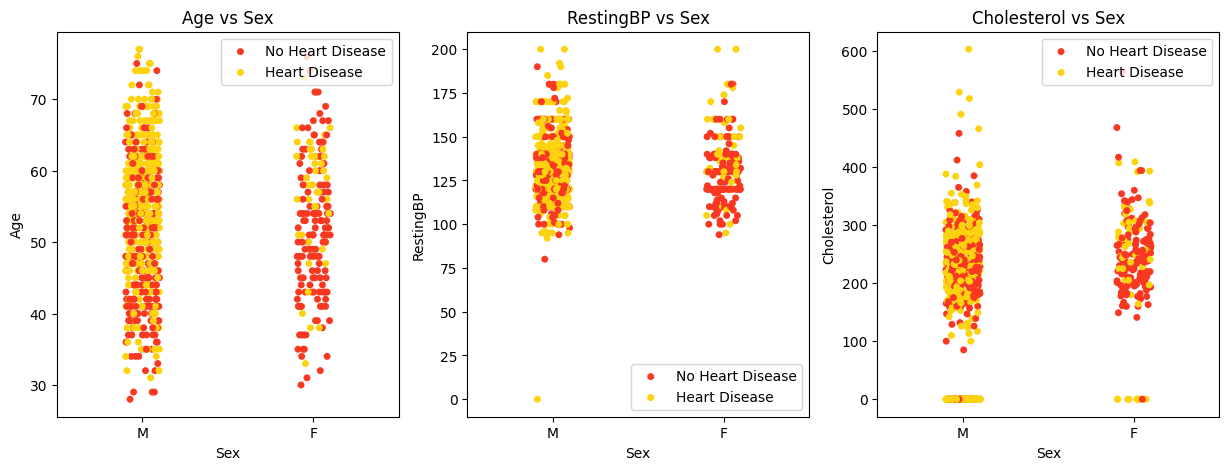

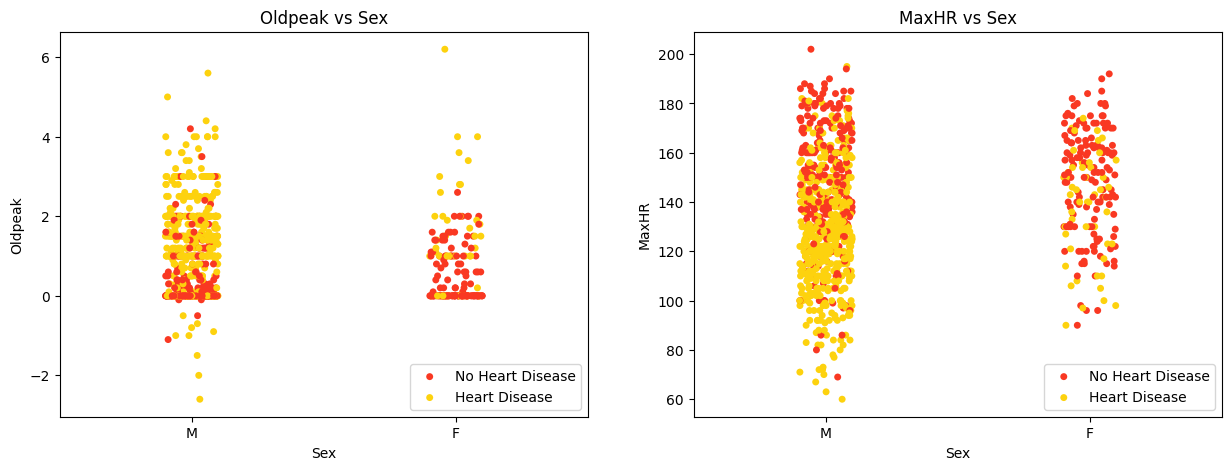

In [57]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);

- La población **masculina** muestra enfermedades cardíacas en casi todos los valores de las características numéricas. Por encima de los 50 años, los valores máximos positivos y la frecuencia cardíaca máxima por debajo de 140, las enfermedades cardíacas en la población masculina se vuelven densas.
- Los puntos de datos de la población **femenina** son muy inferiores en comparación con los puntos de datos de la población **masculina**. Por lo tanto, no podemos señalar rangos o valores específicos que muestren casos de enfermedades cardíacas.

#### ChestPainType vs Caracteristicas numericas :

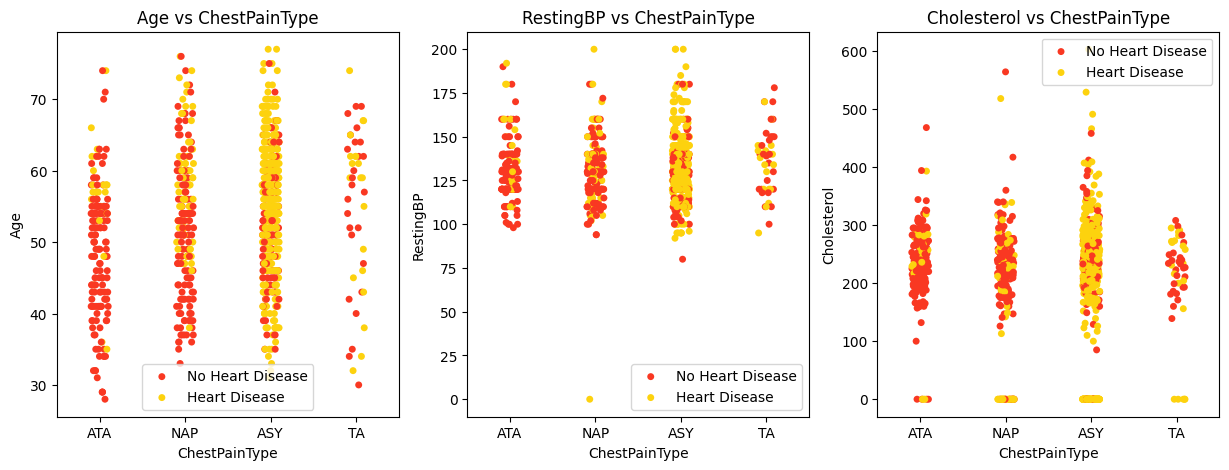

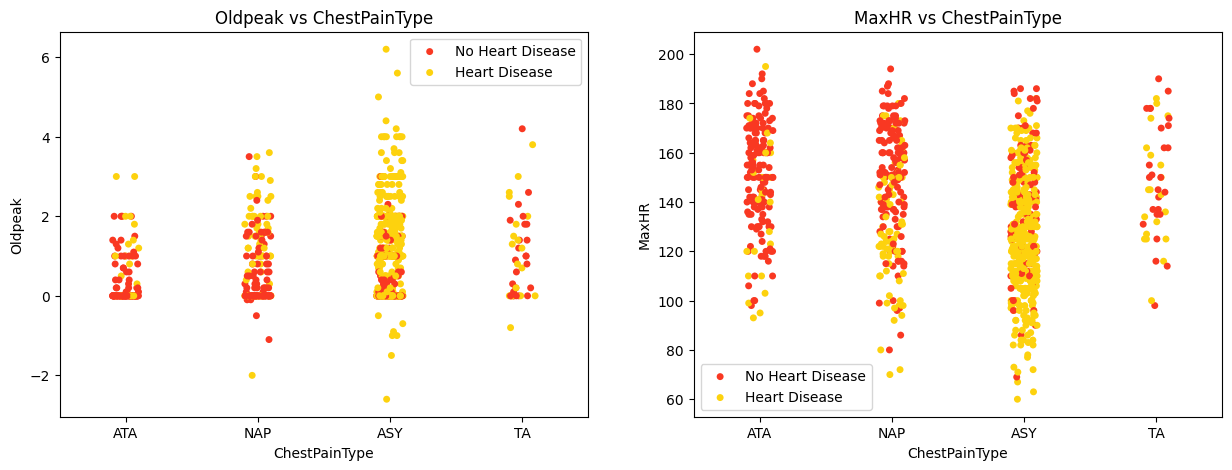

In [58]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

- **ASY** el tipo de dolor en el pecho domina por mucho a otros tipos de dolor en el pecho en todas las características numéricas.

#### FastingBS vs Numerical features :

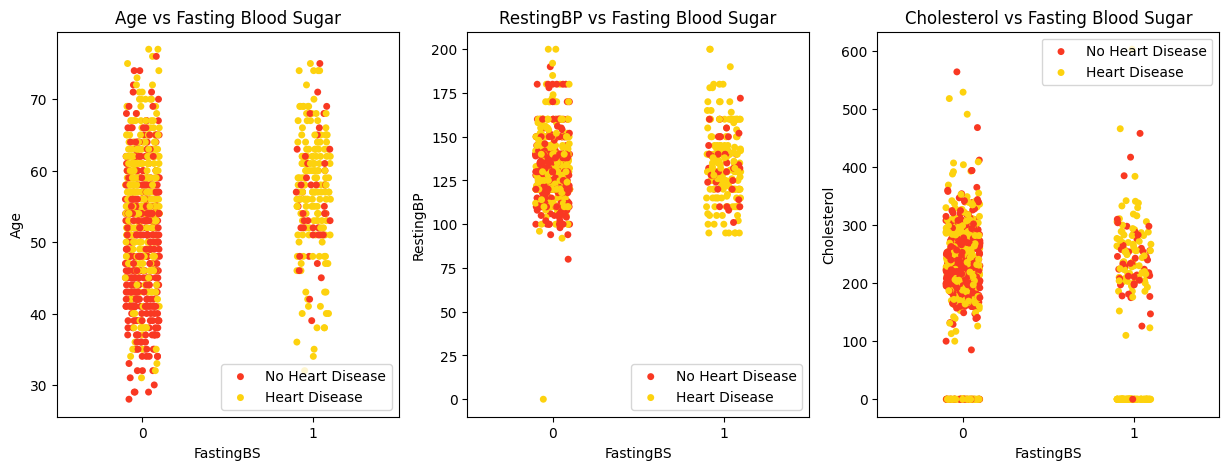

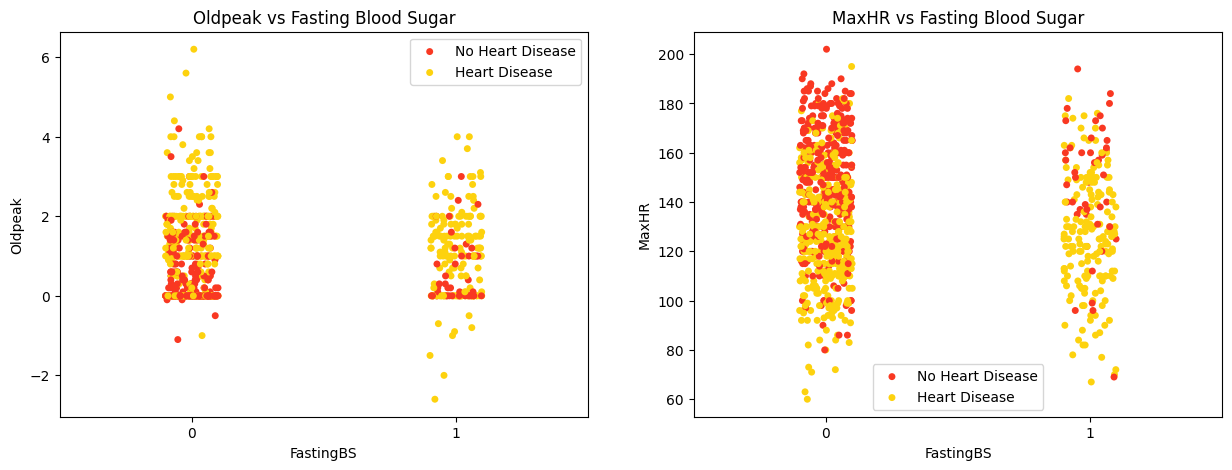

In [59]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar'
    plt.title(title);

- Por encima de los 50 años de **edad**, las enfermedades cardíacas se encuentran en todos los datos, independientemente de si al paciente se le diagnosticó azúcar en la sangre en ayunas o no.
- **El nivel de azúcar en la sangre en ayunas** con una **PA en reposo** superior a 100 ha mostrado más casos de enfermedades cardíacas que los pacientes sin niveles de azúcar en la sangre en ayunas.
- El **colesterol** con **azúcar en sangre en ayunas** no parece tener ningún efecto en la comprensión de la razón detrás de las enfermedades cardíacas.
- Los pacientes a los que no se les ha dado positivo en **azúcar en sangre en ayunas** pero que tienen una frecuencia cardíaca máxima inferior a 130 son más propensos a sufrir enfermedades cardíacas.

#### RestingECG vs Numerical Features :

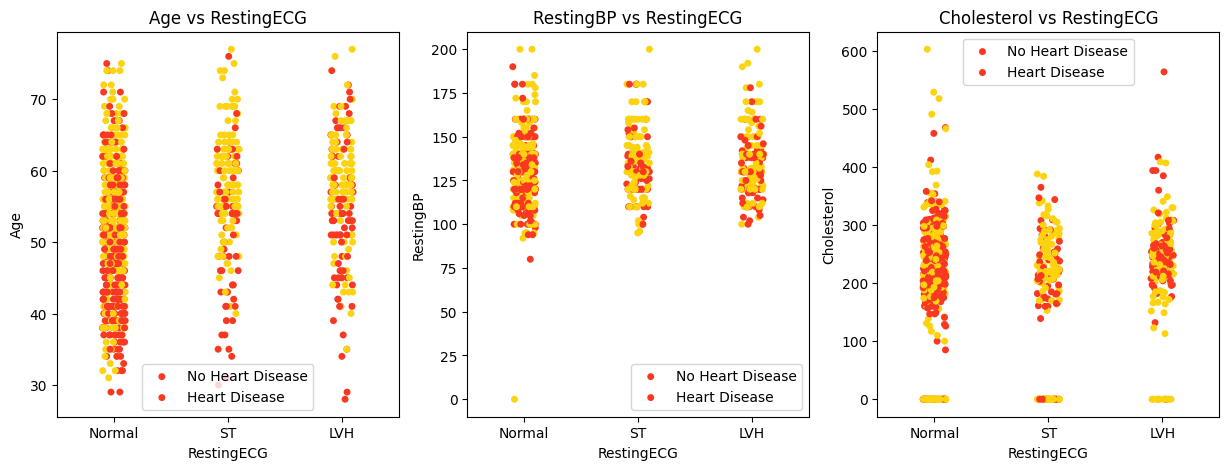

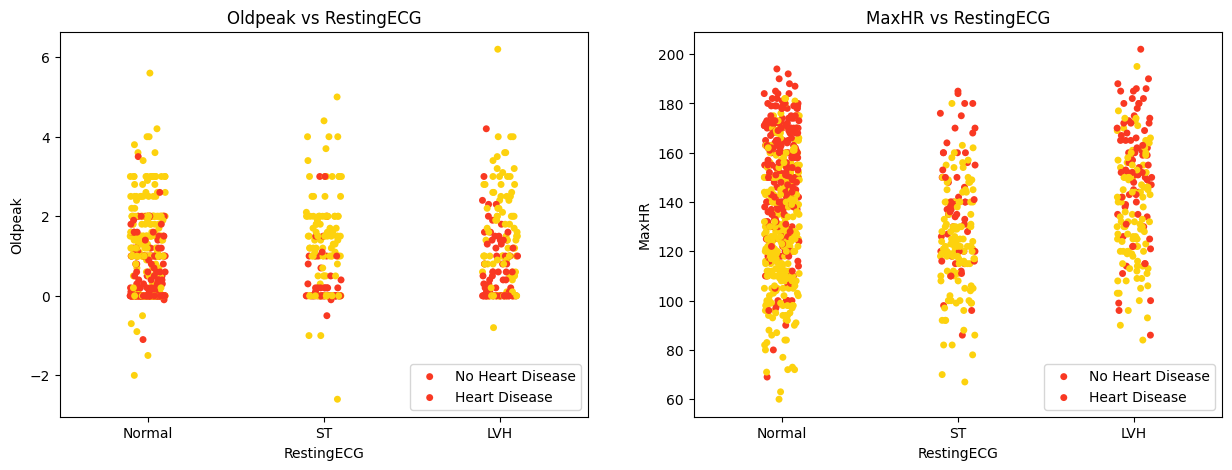

In [60]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);

- Las enfermedades cardíacas con valores de **ECG en reposo** de **Normal**, **ST** y **HVI** se detectan a partir de 30, 40 y 40 respectivamente. Los pacientes mayores de 50 años son más propensos que cualquier otra edad, independientemente de los valores de **ECG en reposo**.
- Las enfermedades cardíacas se encuentran consistentemente en cualquier valor de **RestingBP** y **RestingECG**.
- Los valores de **colesterol** entre 200 y 300 junto con el valor de **ST** de **ECG en reposo** muestran un grupo de pacientes que padecen enfermedades cardíacas.
- Para valores de **frecuencia cardíaca máxima**, las enfermedades cardíacas se detectan en niveles densos por debajo de 140 puntos y ECG en reposo **normal**. **ST** y **LVH** en todos los valores de frecuencia cardíaca máxima muestran casos de enfermedades cardíacas.

#### ExerciseAngina vs Numerical Features :

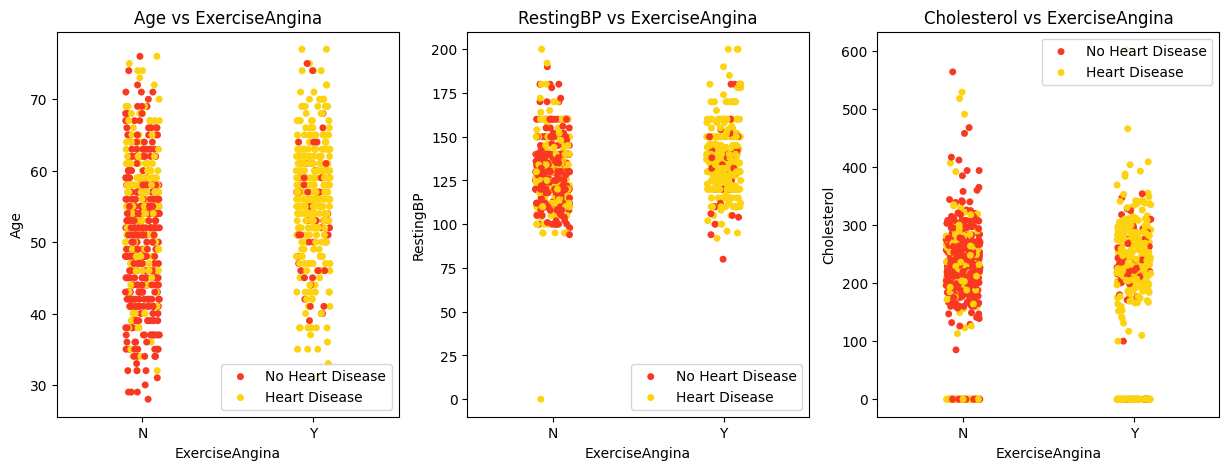

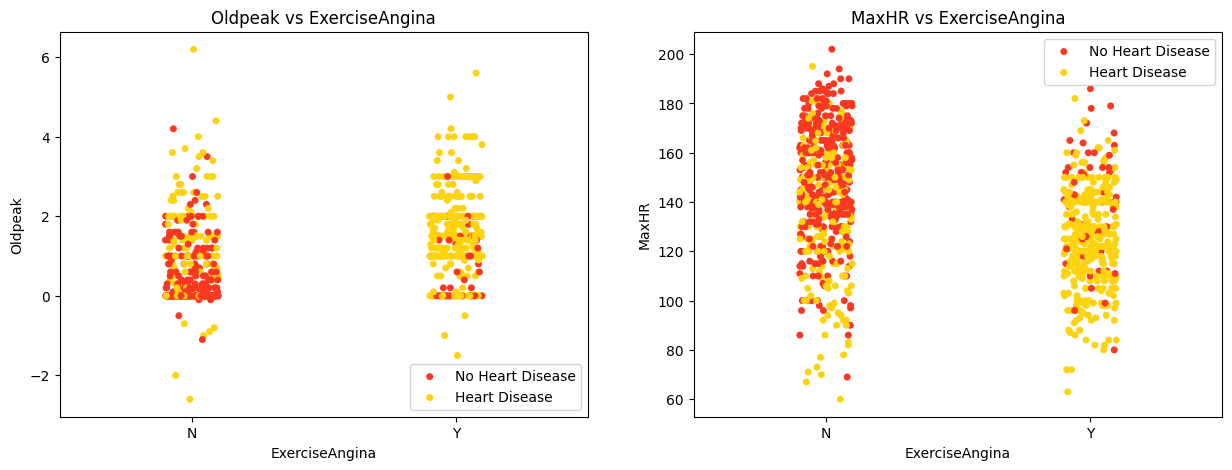

In [61]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

- Se puede hacer una observación muy clara sobre la relación entre los casos de **enfermedad cardíaca** y la **Angina inducida por el ejercicio**. Se puede concluir una correlación positiva entre las 2 características en todas las características numéricas..

#### ST_Slope vs Numerical Features :

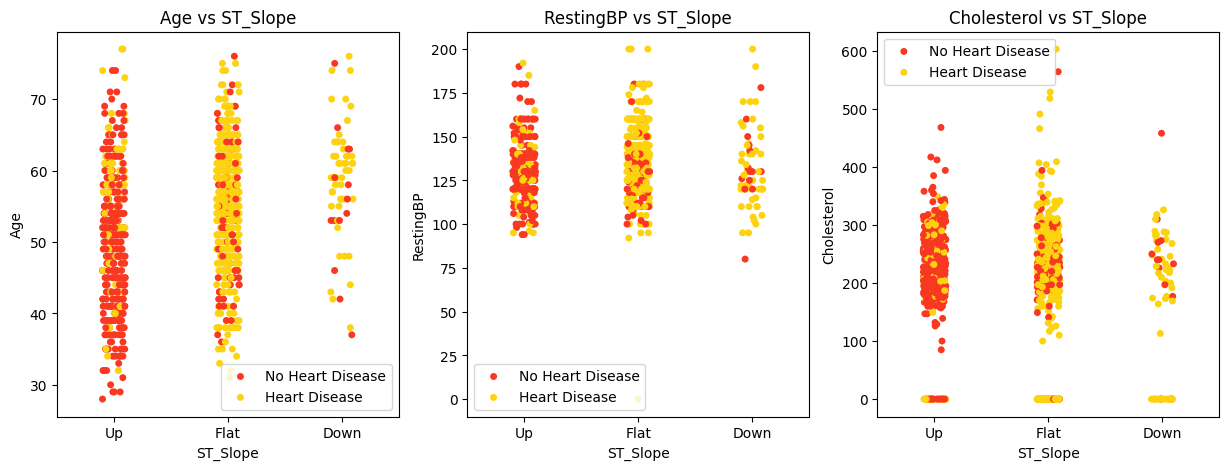

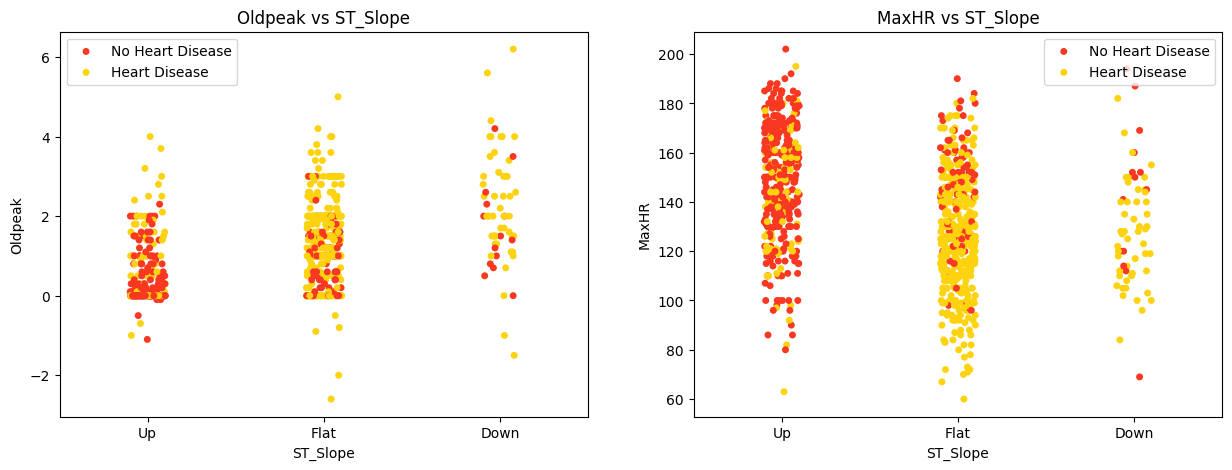

In [62]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

- Se puede hacer otra observación positiva muy clara sobre la correlación positiva entre el valor de **ST_Slope** y los casos de **Enfermedad cardíaca**.
- **Flat**, **Down** y **Up** en ese orden muestran una probabilidad alta, media y baja de ser diagnosticado con enfermedades cardíacas, respectivamente.

### Numerical features vs Numerical features w.r.t Target variable(HeartDisease) :

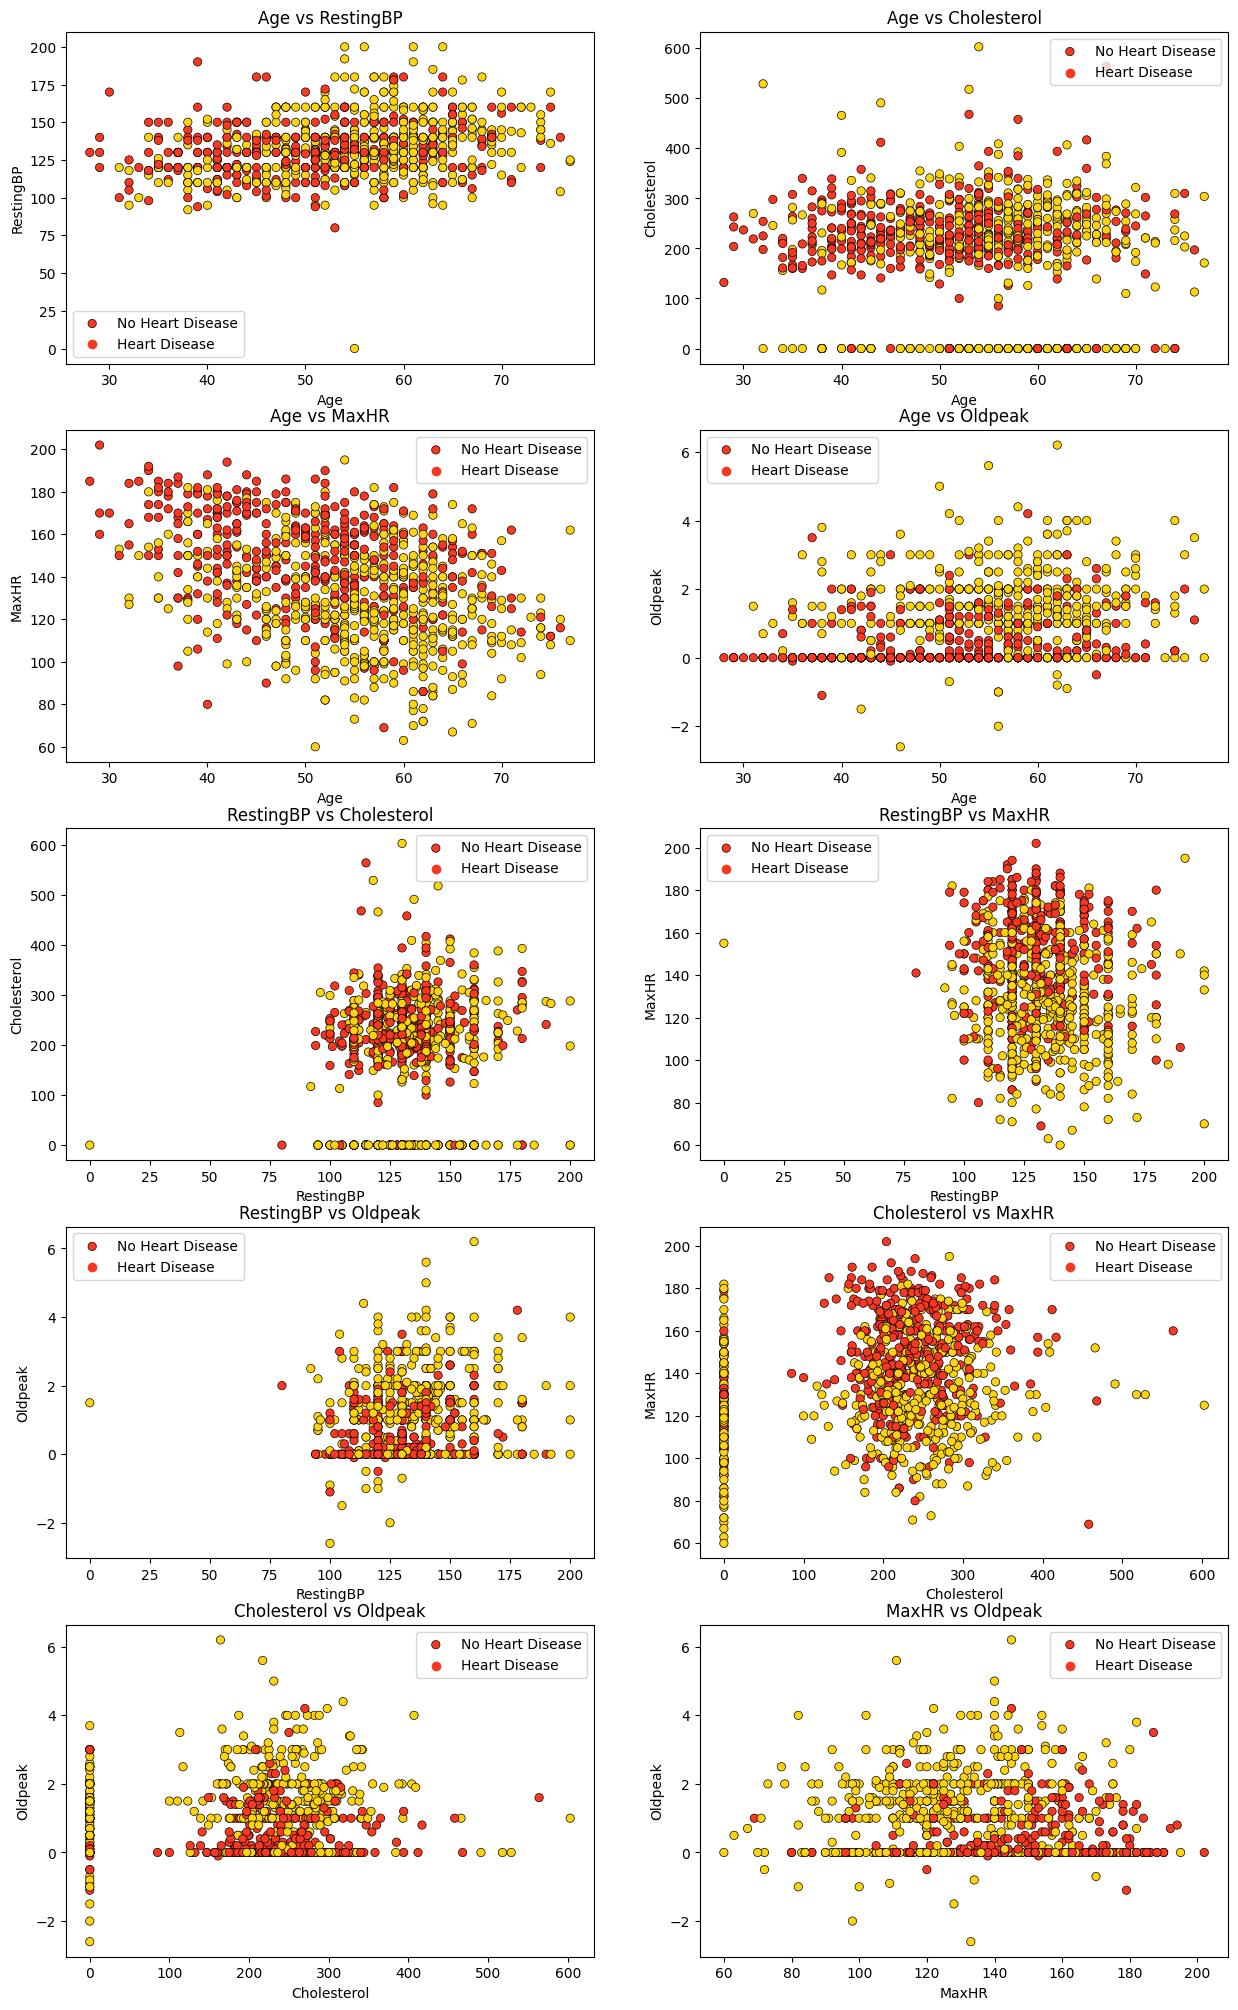

In [63]:
a = 0
fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (15,25))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,hue = 'HeartDisease',palette = colors, edgecolor = 'black');
            plt.legend(['No Heart Disease', 'Heart Disease'])
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

- Para **edad** mayor de 50 años, **BP en reposo** entre 100 y 175, nivel de **colesterol** entre 200 y 300, **frecuencia cardíaca máxima** inferior a 160 y valores positivos **pico anterior** muestran casos altos de enfermedades del corazón.
- Para valores de **BP en reposo** de 100 a 175, se resaltan demasiados pacientes con enfermedades cardíacas para todas las funciones.
- **Los valores de colesterol** entre 200 y 300 dominan los casos de enfermedades cardíacas. - De manera similar, los valores de **Frecuencia cardíaca máxima** inferiores a 140 tienen una alta probabilidad de que se le diagnostique una enfermedad cardíaca.

# <center><div style="font-family: Trebuchet MS; background-color: #F93822; color: #FDD20E; padding: 12px; line-height: 1;">Resumen de EDA</div></center>

### Orden / Valores de características para casos positivos de enfermedad cardíaca. :

- **Características categóricas (Orden) :**
    - Sex : Male > Female
    - ChestPainType : ASY > NAP > ATA > TA
    - FastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
    - RestingECG : Normal > ST > LVH
    - ExerciseAngina : Angina > No Angina
    - ST_Slope : Flat > Up > Down

- **Características numéricas (rango) :**
    - Age : 50+
    - RestingBP : 95 - 170
    - Cholesterol : 160 - 340
    - MaxHR : 70 - 180
    - Oldpeak : 0 - 4
    
    
**Ahora que hemos entendido los valores típicos de las características, pasamos al siguiente paso donde seleccionamos las características apropiadas para modelar.**

# <center><div style="font-family: Trebuchet MS; background-color: #F93822; color: #FDD20E; padding: 12px; line-height: 1;">Ingeniería de características</div></center>

### Escalado de datos :

In [64]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,1,1,0.41,0.83,0,1,1.38,0,0.30,2,0
1,-0.48,0,2,1.49,-0.17,0,1,0.75,0,0.41,1,1
2,-1.75,1,1,-0.13,0.77,0,2,-1.53,0,0.30,2,0
3,-0.58,0,0,0.30,0.14,0,1,-1.13,1,0.47,1,1
4,0.05,1,2,0.95,-0.03,0,1,-0.58,0,0.30,2,0


- El Machine learning no comprende las unidades de los valores de las características. Trata la entrada simplemente como un número simple pero no comprende el verdadero significado de ese valor. Por tanto, se hace necesario escalar los datos.

**Ej :** Age = Years; FastingBS = mg / dl

- Tenemos 2 opciones para escalar datos: 1) **Normalización** 2) **Estandarización**. Como la mayoría de los algoritmos asumen que los datos están distribuidos normalmente (gaussianos), la **normalización** se realiza para características cuyos datos no muestran una distribución normal y la **estandarización** se lleva a cabo para características que están normalmente distribuidas donde sus valores son enormes o muy pequeños en comparación con otras características.


- **Normalización**: la característica **Oldpeak** está normalizada ya que mostraba una distribución de datos sesgada hacia la derecha.
- **Estandarización**: las funciones **Edad**, **PA en reposo**, **Colesterol** y **FC máxima** se reducen porque estas funciones se distribuyen normalmente.

### Matriz de correlacion :

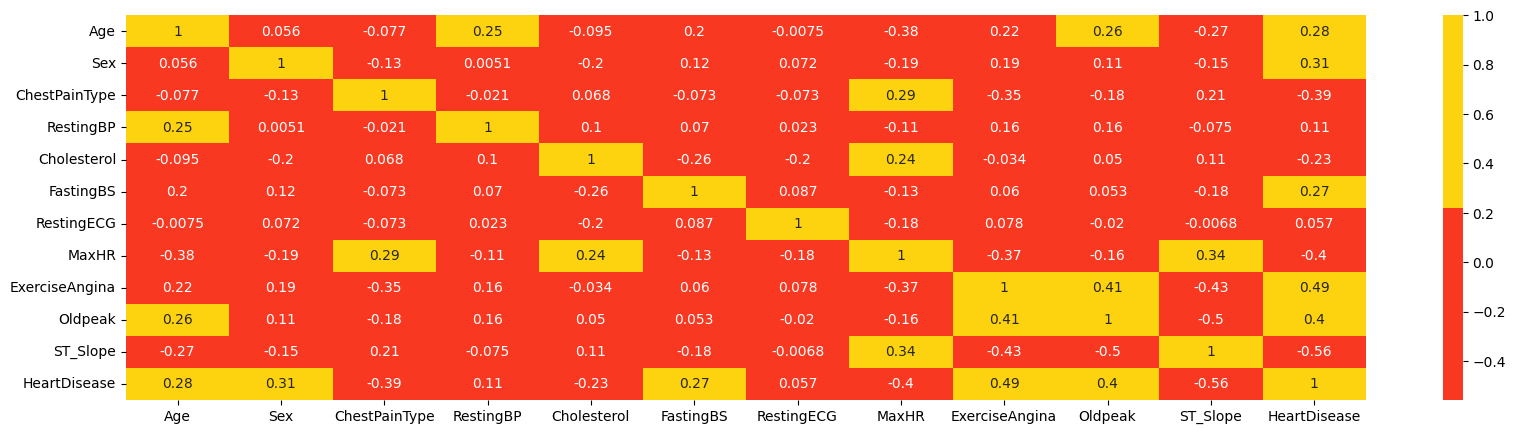

In [65]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

- Es una matriz enorme con demasiadas funciones. Comprobaremos la correlación únicamente con respecto a **HeartDisease**.

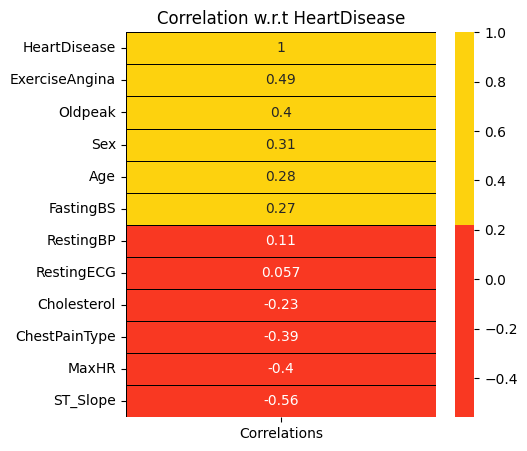

In [66]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

- Excepto **RestingBP** y **RestingECG**, todos muestran una relación positiva o negativa con **HeartDisease**.

### Selección de funciones para caracteristicas categóricas :

#### Prueba de chi cuadrado :

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

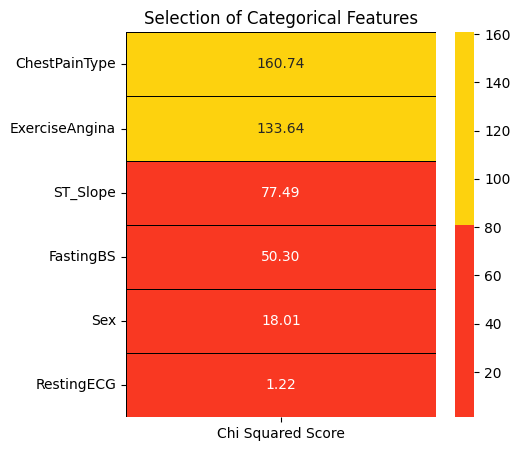

In [68]:
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

- Excepto **ECG en reposo**, todas las características categóricas restantes son bastante importantes para predecir enfermedades cardíacas.

### Selección de funciones para caracteristicas numéricas :

#### Prueba ANOVA :

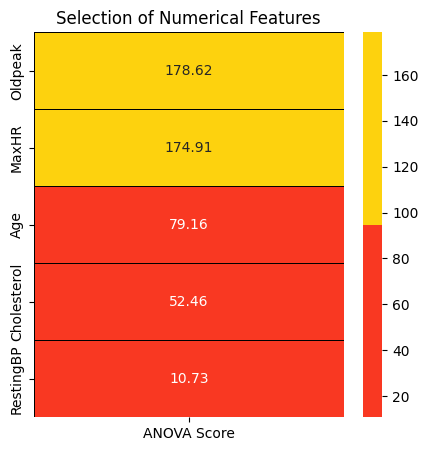

In [69]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

- Dejaremos fuera **RestingBP** de la parte de modelado y tomaremos las características restantes.

# <center><div style="font-family: Trebuchet MS; background-color: #F93822; color: #FDD20E; padding: 12px; line-height: 1;">Modelamiento</div></center>

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [79]:
features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

- Selecting the features from the above conducted tests and splitting the data into **80 - 20 train - test** groups.

In [84]:
def model(classifier):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

#### 1] Logistic Regression :

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

Accuracy :  87.50%
Cross Validation Score :  91.12%
ROC_AUC Score :  87.43%


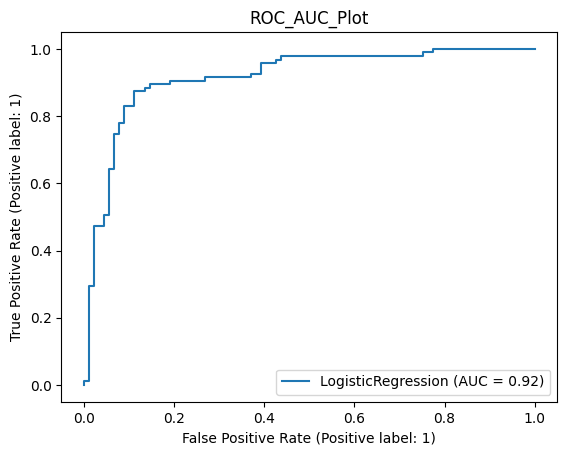

In [87]:
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



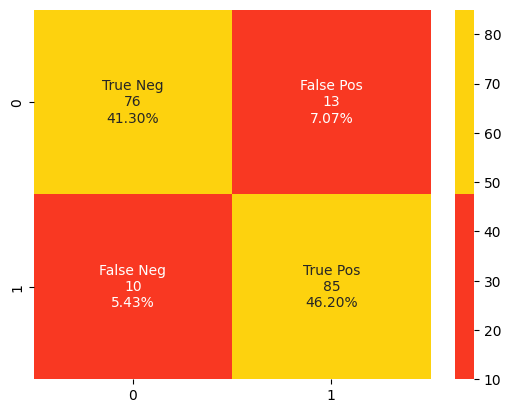

In [88]:
model_evaluation(classifier_lr)

#### 2] Support Vector Classifier :

In [89]:
from sklearn.svm import SVC

In [90]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

Accuracy :  87.50%
Cross Validation Score :  90.53%
ROC_AUC Score :  87.43%


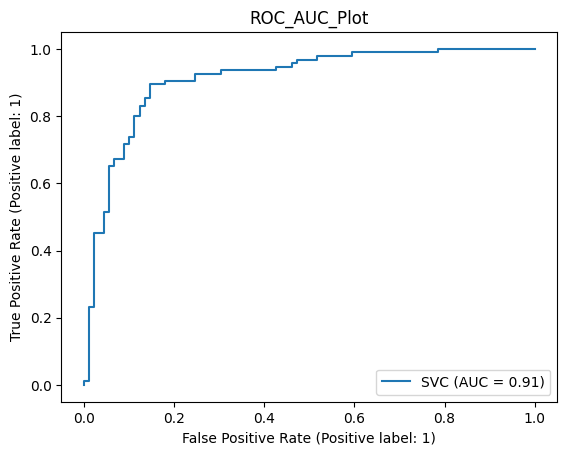

In [91]:
model(classifier_svc)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



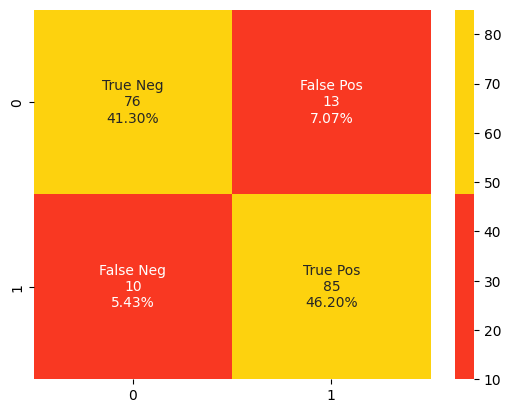

In [92]:
model_evaluation(classifier_svc)

#### 3] Decision Tree Classifier :

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Accuracy :  84.78%
Cross Validation Score :  89.09%
ROC_AUC Score :  84.62%


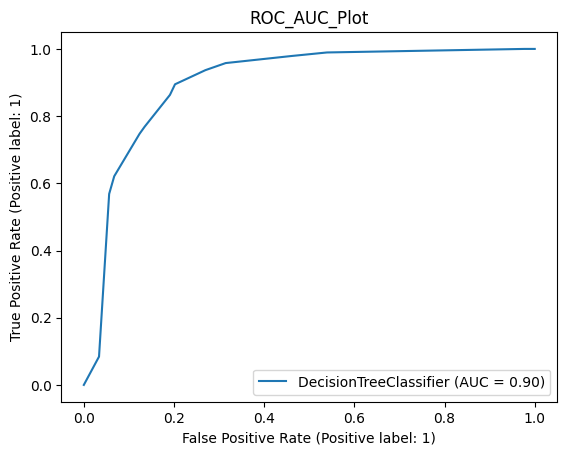

In [95]:
model(classifier_dt)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



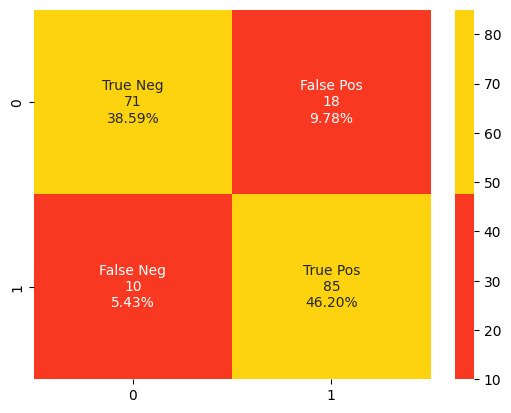

In [96]:
model_evaluation(classifier_dt)

#### 4] Random Forest Classifier :

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Accuracy :  84.24%
Cross Validation Score :  92.91%
ROC_AUC Score :  84.06%


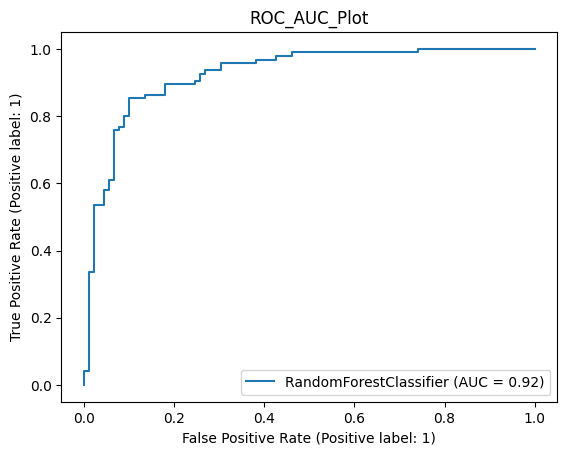

In [99]:
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.82      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



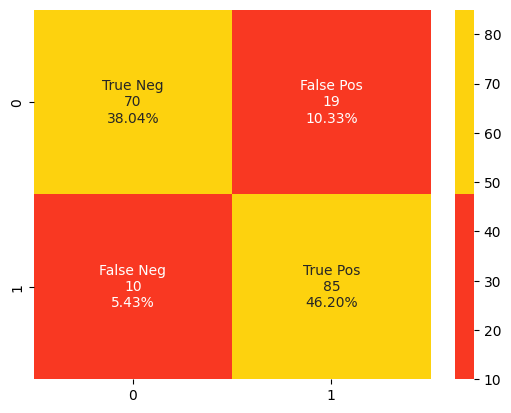

In [100]:
model_evaluation(classifier_rf)

#### 5] K-nearest Neighbors Classifier :

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Accuracy :  81.52%
Cross Validation Score :  89.34%
ROC_AUC Score :  81.36%


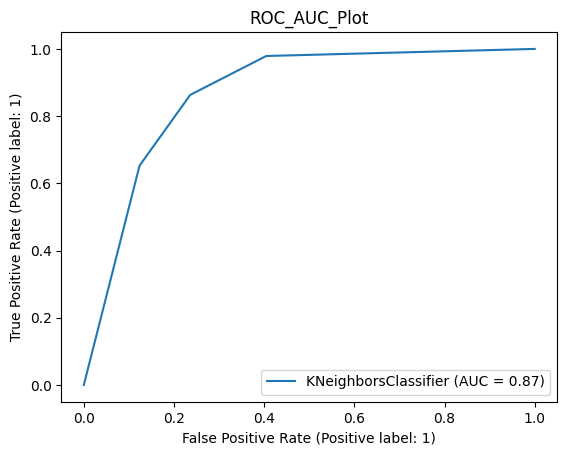

In [103]:
model(classifier_knn)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        89
           1       0.80      0.86      0.83        95

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



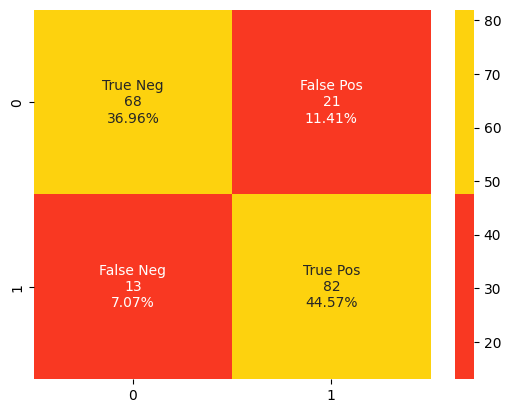

In [104]:
model_evaluation(classifier_knn)

### Tabla de resultados de algoritmos :


|Sr. No.|ML Algorithm|Accuracy|Cross Validation Score|ROC AUC Score|
|-|-|-|-|-|
|1|Logistic Regression|87.50%|91.12%|87.43%|
|2|Support Vector Classifier|87.50%|90.53%|87.43%|
|3|Decision Tree Classifier|84.78%|89.09%|84.62%|
|4|Random Forest Classifier|84.24%|92.91%|84.06%|
|5|K-Nearest Neighbors Classfier|81.52%|89.34%|81.36%|

# <center><div style="font-family: Trebuchet MS; background-color: #F93822; color: #FDD20E; padding: 12px; line-height: 1;">Conclusiones</div></center>

- Este conjunto de datos es excelente para comprender cómo manejar problemas de clasificación binaria con la combinación de características numéricas y categóricas.


- Se puede ayudar a los expertos en la materia, en este caso médicos o enfermeras, brindándoles conocimientos que les permitan tomar la siguiente línea de acción.


- Para la ingeniería, puede resultar confuso el orden de los procesos. En este caso, el escalado de datos se ejecutó antes de la prueba de selección de funciones. Podríamos sentir que estamos manipulando los datos antes de pasarlos a las pruebas, pero los resultados son los mismos independientemente del orden del proceso.


- Para este problema, no se realizó la detección de valores atípicos porque no pude leer ningún artículo sobre enfermedades cardíacas. Se convierte en una parte fundamental comprender el tema antes de eliminar valores atípicos, incluso si las pruebas de detección de valores atípicos resultan positivas.


- La visualización es clave. Hace que los datos sean habladores. Mostrar la información actual y los resultados de cualquier prueba o resultado a través de la visualización se vuelve crucial ya que facilita la comprensión.


- Para el modelado, no se realiza el ajuste de hiperparámetros. Puede impulsar el rendimiento de los algoritmos. En general, el rendimiento del algoritmo es bueno.